Name: Kesse Asante

Labpartner(s)

In [1]:
#import statements go here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [4]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [16]:
# set time-increment and discretize the time
T  = 15.0                           # final time #Total amount of time we gonna solve this for
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [17]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [12]:
n = 0
u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [13]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

In [18]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [19]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [20]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

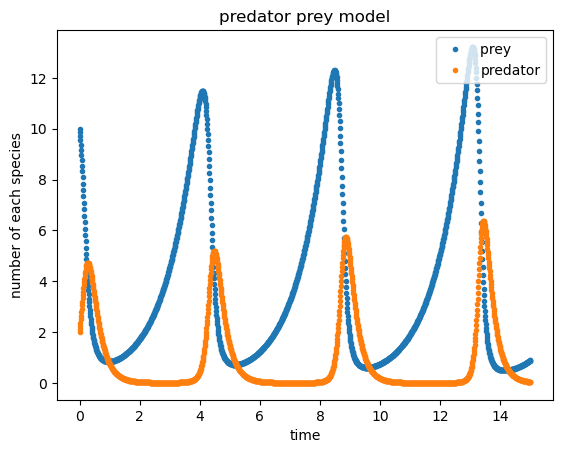

In [22]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model");

Let's think a bit about what this solution means, what is going on here?

The initial amounts of prey and predators are 10 and 2 respectively. This means that the prey are a lot more than the predators results in the trend seen above. Because there are not so many predators to feed on the preys, the preys get the chance to grow exponentially whenever the predators are not feeding.  

What happens if we start with different initial conditions? Like more prey and less predators.

In [23]:
# initial conditions (initial populations):
x0 = 15. # initial prey amount
y0 = 0. # initial predator amount
t0 = 0.

In [24]:
# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [25]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [26]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

What happened?

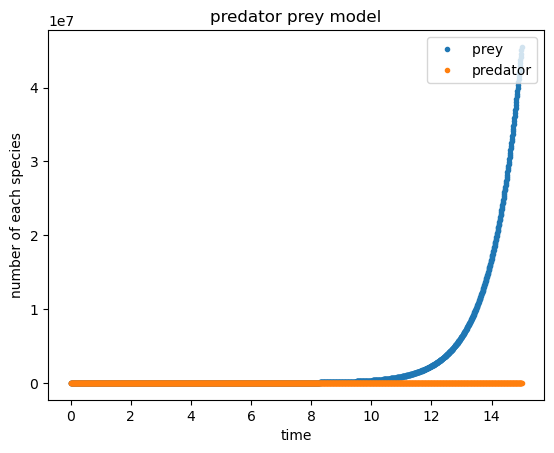

In [27]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model");

What if we start with the same amount of prey and predators?

In [44]:
# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

What happened?

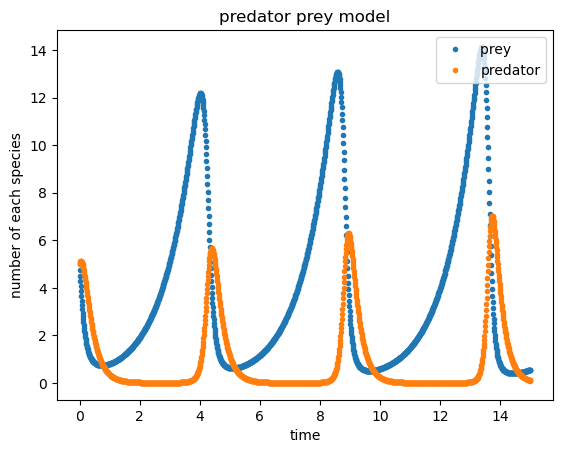

In [45]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model");

Text(0.5, 1.0, 'predator prey model')

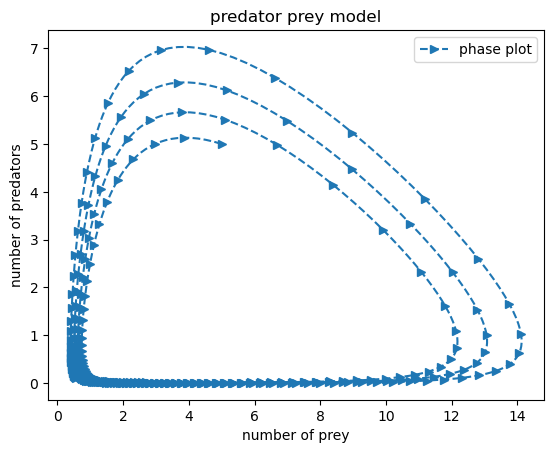

In [46]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Let's mess around with the model parameters. What if the prey grow faster?

In [47]:
# set the parameters
alpha = 10.
beta = 1.2
gamma = 4.
delta = 1.

In [48]:
# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

What happened?

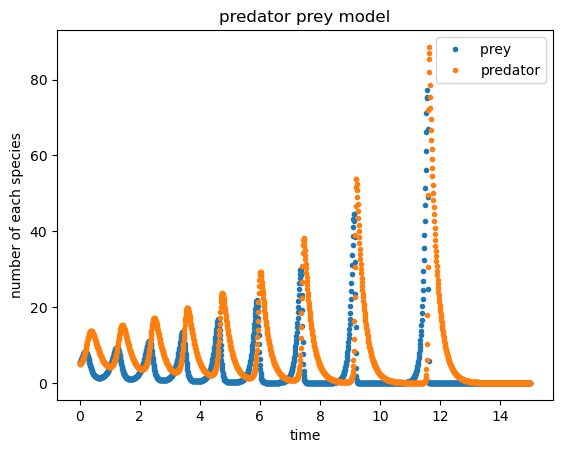

In [49]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model");

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

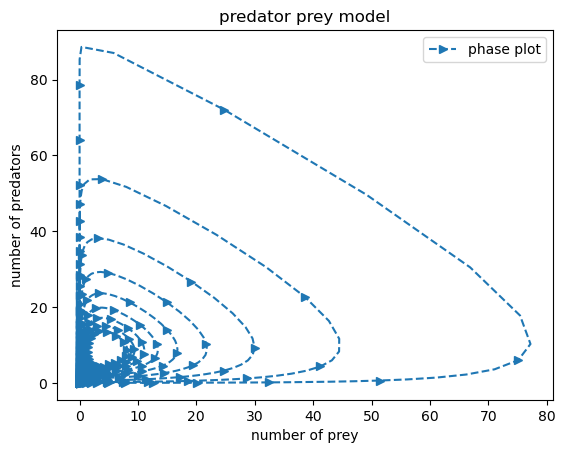

In [50]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

#### DT to 10 times bigger

In [68]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [83]:
T  = 15.0              
dt = 0.1               
N  = int(T/dt) + 1      

# initial conditions (initial populations):
x0 = 10. 
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# input initial conditions
u_euler[0] = np.array([x0, y0])

print(N)

151


In [84]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [85]:
time = np.linspace(0.0, T,N)  #for 15 years a time array for plotting
x_euler = u_euler[:,0]    #prey
y_euler = u_euler[:,1]    #predator

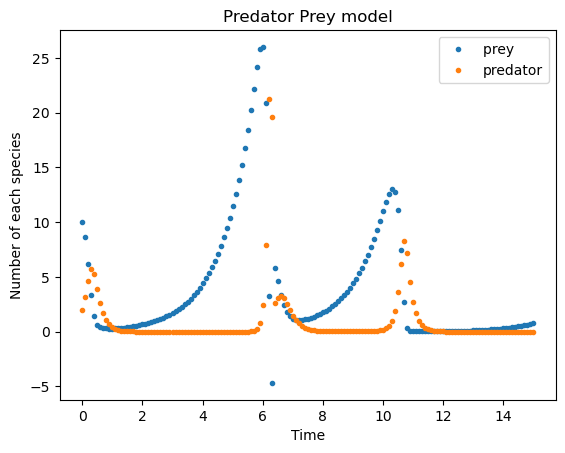

In [86]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

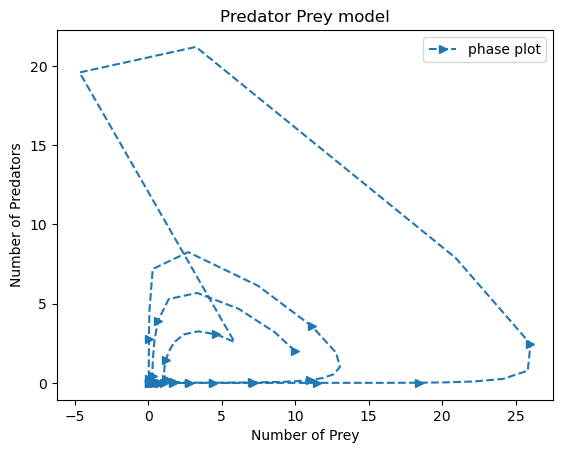

In [89]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

#### DT to 10 times smaller 

In [90]:
T  = 15.0              
dt = 0.001               
N  = int(T/dt) + 1      

# initial conditions (initial populations):
x0 = 10. 
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# input initial conditions
u_euler[0] = np.array([x0, y0])

print(N)

15001


In [92]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)  
x_euler = u_euler[:,0]   
y_euler = u_euler[:,1]

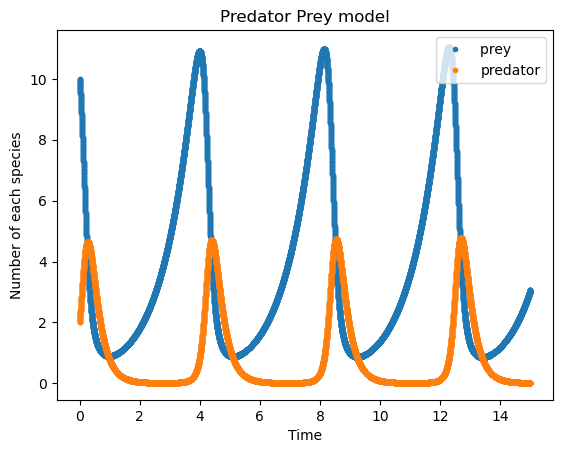

In [93]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

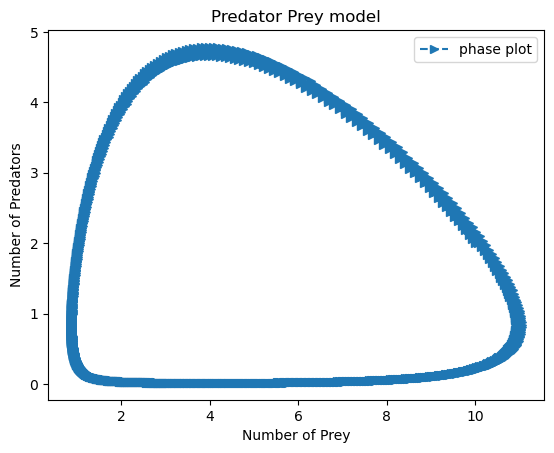

In [94]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

#### DT to 100 times smaller 

In [95]:
T  = 15.0              
dt = 0.0001               
N  = int(T/dt) + 1      

# initial conditions (initial populations):
x0 = 10. 
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# input initial conditions
u_euler[0] = np.array([x0, y0])

print(N)

150001


In [96]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)  
x_euler = u_euler[:,0]   
y_euler = u_euler[:,1]

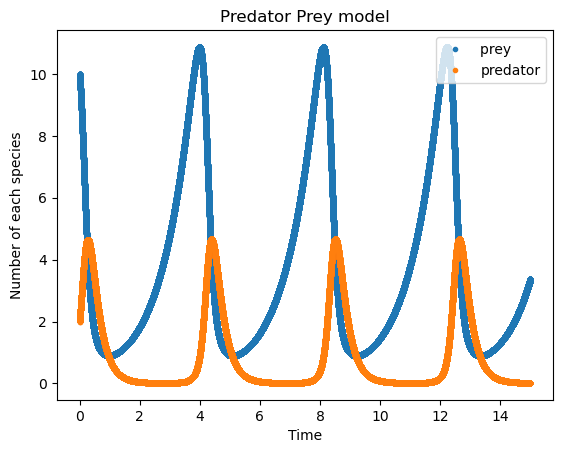

In [97]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

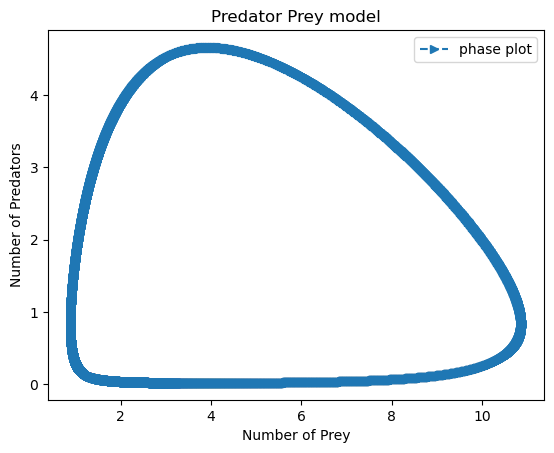

In [100]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

Changes in speed influence the recovery cycle between predator and prey. When the rate increases, the number of time steps decreases, leading to a shorter cycle length over time. Conversely, reducing the rate value increases the number of time steps, resulting in consistent or steady cycles with higher peaks over time.

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



Solve for x and y

 x = 0, y = 0

 x = $\gamma  / \delta $, y = $\alpha / \beta $

In [104]:
alpha = 1.
beta = 1.2
gamma = 4
delta = 1

def euler_step(u, f, dt):
    return u + dt * f(u)

def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

T = 15.0
dt = 0.01
N = int(T / dt) + 1

#Same number of prey and predator from past example
x0 = 10.
y0 = 2.
t0 = 0

#applying the function
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]

#Steady state
x_st = gamma / delta
y_st = alpha / beta

In [105]:
print(x_st)

4.0


In [106]:
print(y_st)

0.8333333333333334


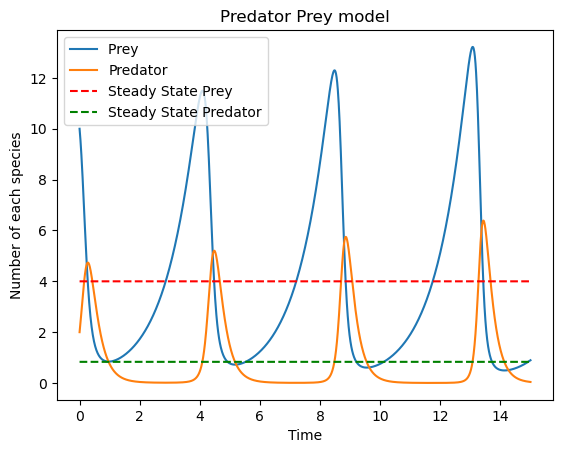

In [122]:
plt.plot(time, x_euler, label = 'Prey ')
plt.plot(time, y_euler, label = 'Predator')
plt.plot(time, x_st * np.ones(N), linestyle = 'dashed', color = "red", label='Steady State Prey')
plt.plot(time, y_st * np.ones(N), linestyle = 'dashed', color = "green", label='Steady State Predator')
plt.legend(loc='upper left')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model")
plt.show();

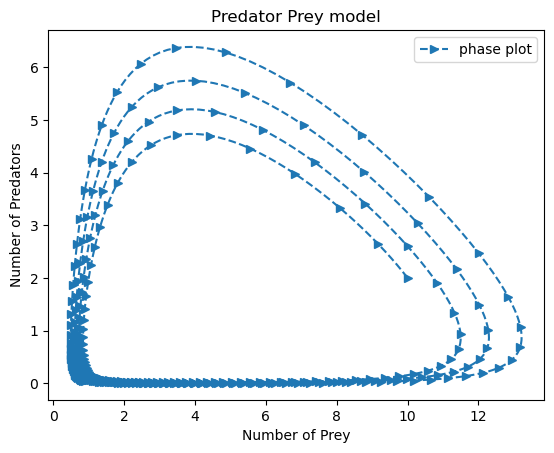

In [123]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

The steady-state population levels for prey and predator are 4 and 0.83 respectively. If the predator and prey populations begin at these values, the system remains static and unchanged. When the initial values are close to the steady-state numbers, the system remains nearly stable, with only minor fluctuations in predator and prey populations.

#### Demosntration of what happens when prey and predator are both in steady state:

In [124]:
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1

T = 15.0
dt = 0.01
N = int(T / dt) + 1


x0 = 4.      # Steady state for prey
y0 = 0.83    # Steady state for predator
t0 = 0

#apply the function
u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N - 1):
    u_euler[n + 1] = euler_step(u_euler[n], f, dt)

time = np.linspace(0.0, T, N)
x_euler = u_euler[:, 0]
y_euler = u_euler[:, 1]


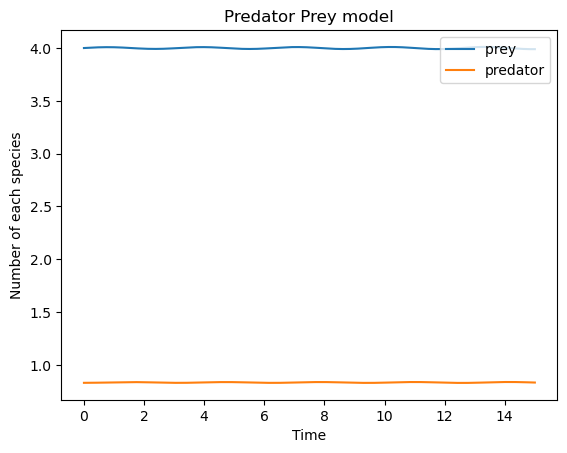

In [125]:
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

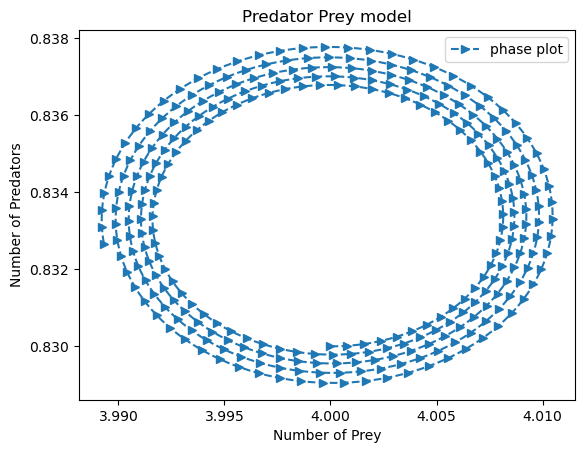

In [126]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [127]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [128]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [143]:
T  = 15.0                           
dt = 0.01                           
N  = int(T/dt) + 1                   

# initial conditions
x0 = 10.
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# input initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]


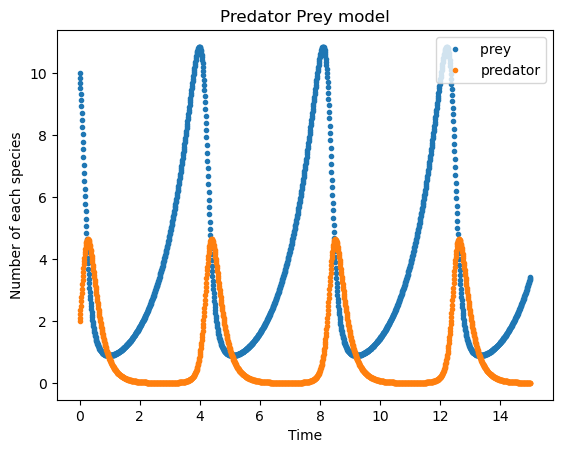

In [144]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

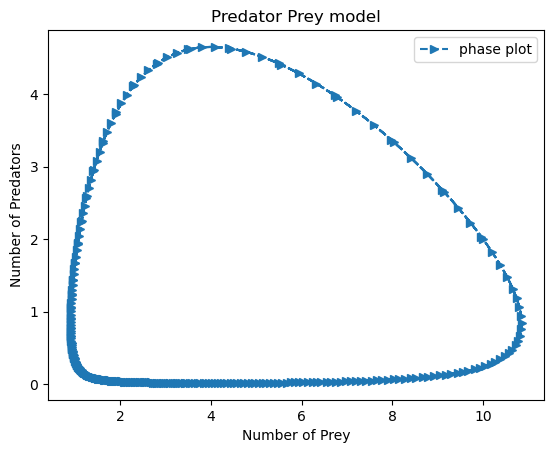

In [145]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [146]:
T  = 15.0                           
dt = 0.1            #10 times bigger                  
N  = int(T/dt) + 1                   

# initial conditions
x0 = 10.
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# input initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

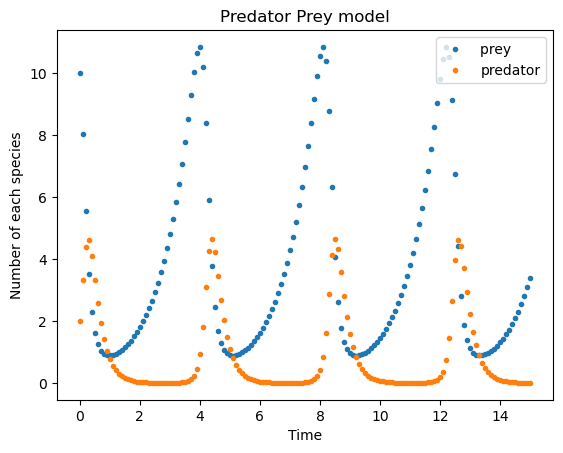

In [147]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

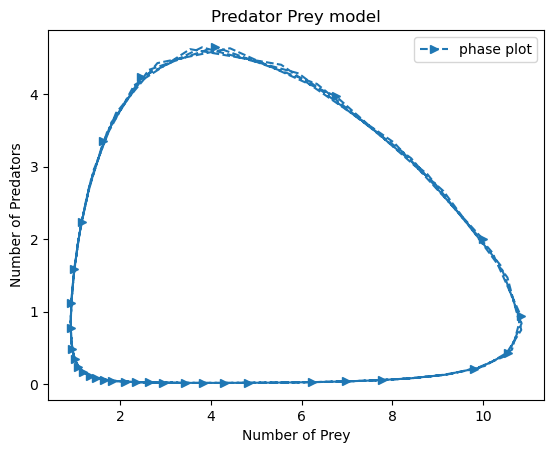

In [148]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [149]:
T  = 15.0                           
dt = 0.001            #10 times smaller                  
N  = int(T/dt) + 1                   

# initial conditions
x0 = 10.
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# input initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

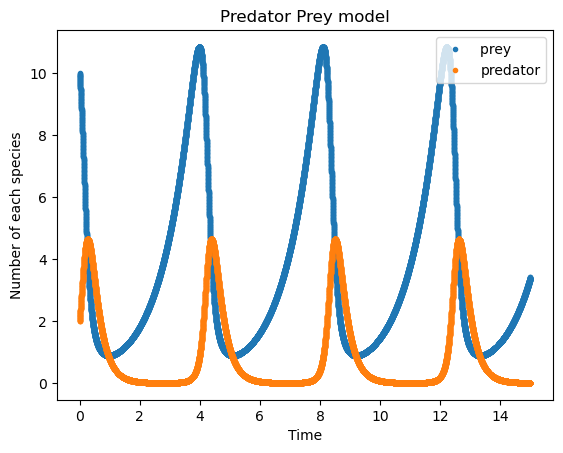

In [150]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

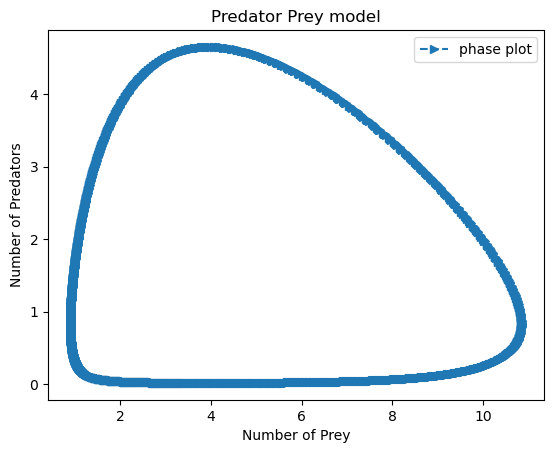

In [151]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [152]:
T  = 15.0                           
dt = 0.0001            #100 times smaller                  
N  = int(T/dt) + 1                   

# initial conditions
x0 = 10.
y0 = 2. 
t0 = 0.

# initialize the array containing the solution for each time-step
u_rk4 = np.zeros((N, 2))

# input initial conditions
u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

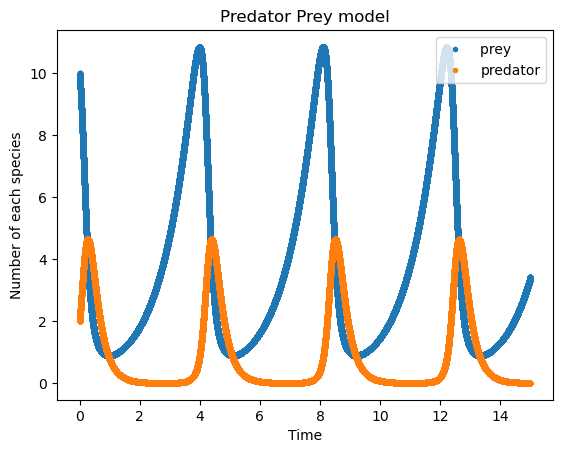

In [153]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

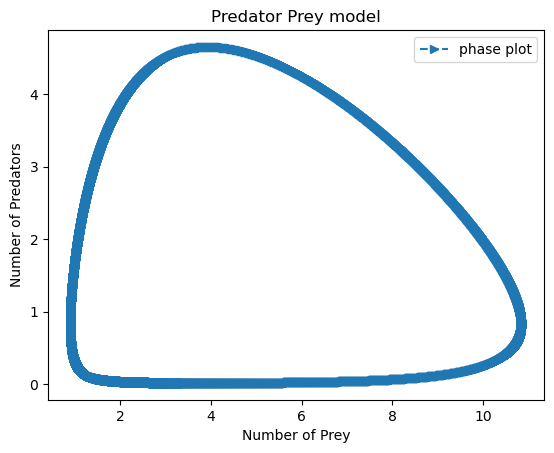

In [154]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

Adjustments to the time step (dt) significantly influence prey-predator predictions, especially when a larger dt value (such as: 0.1) is used. With the RK4 method, the prey-predator cycles maintain consistent intervals and peak patterns, though the number of individuals per cycle is lower compared to smaller dt values. In contrast, the Euler method with a larger dt (0.1) results in shorter recovery cycles between predator and prey, with population numbers decreasing over time. This suggests that the Euler method is more sensitive to changes in dt than the RK4 method, which preserves the number of cycles across dt variations, altering only the population size.

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

In [164]:
alpha = 6.   #alpha changed
beta = 1.2
gamma = 4.
delta = 1

In [165]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

In [166]:
T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                  

x0 = 10. 
y0 = 2. 
t0 = 0.

u_rk4 = np.zeros((N, 2))

u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

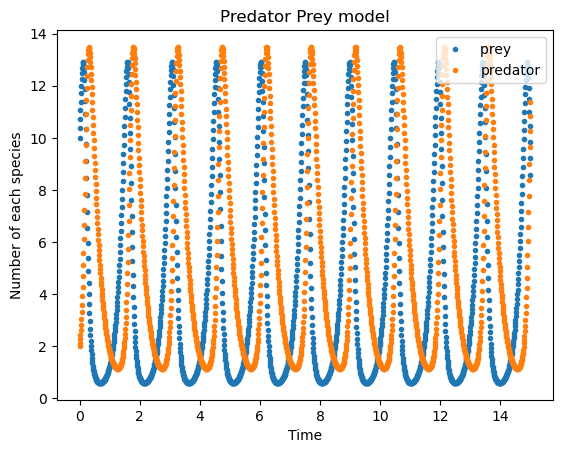

In [167]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

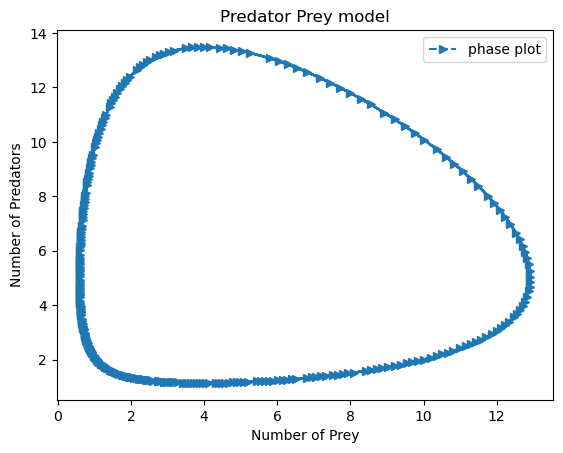

In [168]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [169]:
alpha = 1.    
beta = 3.  # beta changed 
gamma = 4.
delta = 1

In [170]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x * (alpha - beta * y), -y * (gamma - delta * x)])

T  = 15.0                        
dt = 0.01                           
N  = int(T/dt) + 1                  

x0 = 10. 
y0 = 2. 
t0 = 0.

u_rk4 = np.zeros((N, 2))

u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

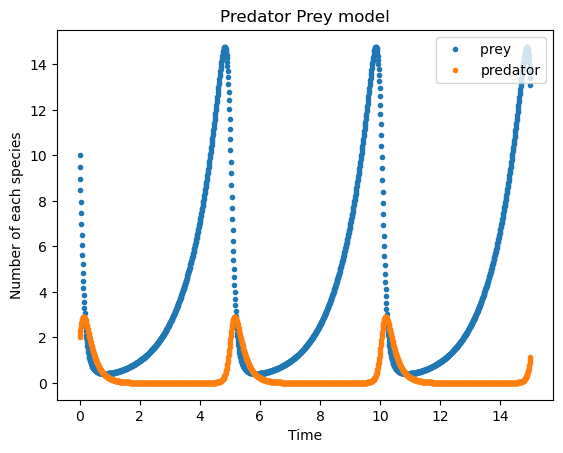

In [171]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

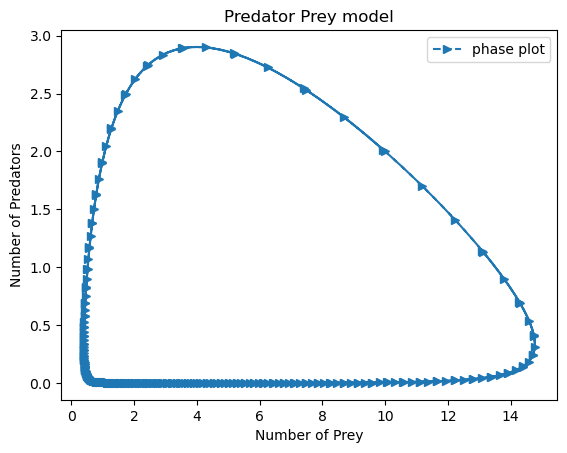

In [172]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [173]:
alpha = 1.    
beta = 1.2
gamma = 8.   #gamma changed 
delta = 1

In [174]:
T  = 15.0                        
dt = 0.01                           
N  = int(T/dt) + 1                  

x0 = 10. 
y0 = 2. 
t0 = 0.

u_rk4 = np.zeros((N, 2))

u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

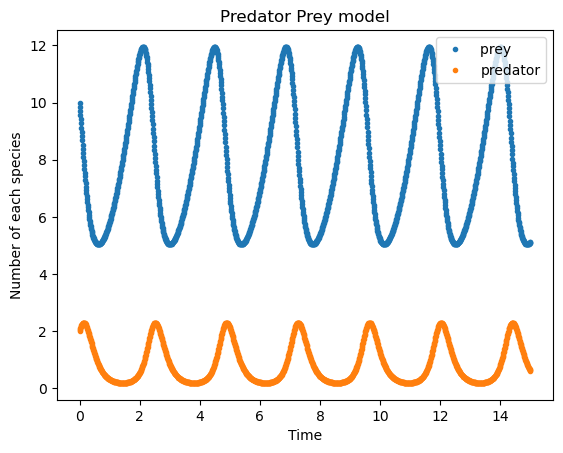

In [175]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

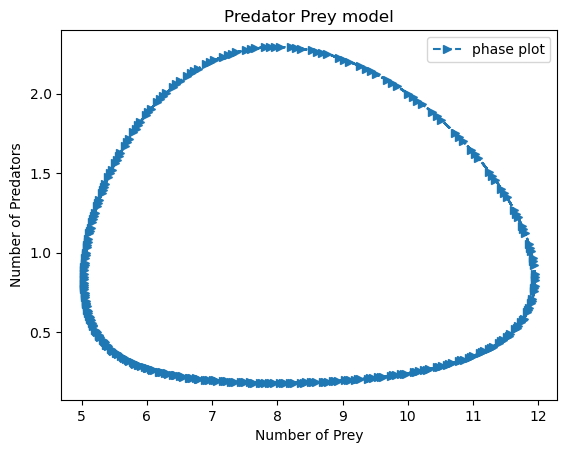

In [176]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

In [186]:
alpha = 1.    
beta = 1.2
gamma = 4.   
delta = 3    #delta changed

In [187]:
T  = 15.0                        
dt = 0.01                           
N  = int(T/dt) + 1                  

x0 = 10. 
y0 = 2. 
t0 = 0.

u_rk4 = np.zeros((N, 2))

u_rk4[0] = np.array([x0, y0])

for n in range(N - 1):
    u_rk4[n + 1] = RK4(u_rk4[n], f, dt)

time = np.linspace(0.0, T, N)
x_rk4 = u_rk4[:, 0]
y_rk4 = u_rk4[:, 1]

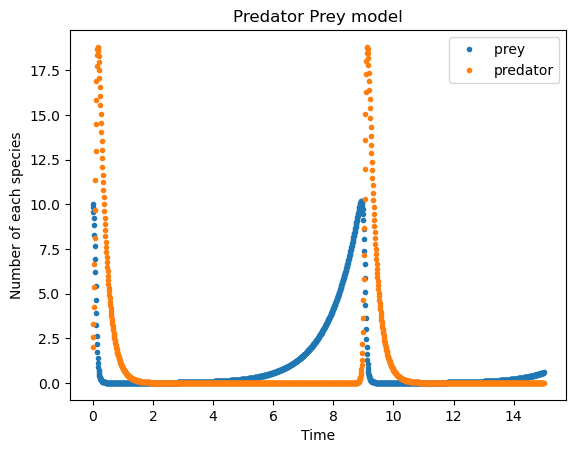

In [188]:
plt.plot(time, x_rk4, '.', label = 'prey ')
plt.plot(time, y_rk4, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Number of each species")
#title
plt.title("Predator Prey model");

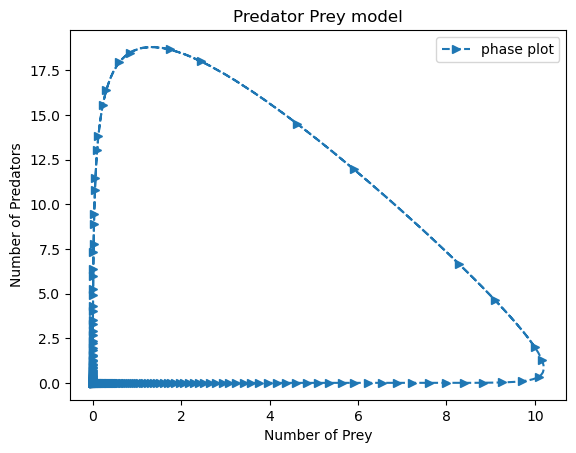

In [189]:
plt.plot(x_rk4, y_rk4, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("Number of Prey")
plt.ylabel("Number of Predators")
#title
plt.title("Predator Prey model");

Increasing the value of alpha reduces the lenght of the cycles, resulting in more short time cycles, with almost similar population peaks for both predator and prey.

Increasing the value of beta extents the cycle of the system, resulting in less cycles and also the number of predator and prey (higher peaks in prey populations than predator).

Increasing the value of gamma resulted in a similar parttern as the steady-state where the system remains the same without predator prey interactions.

Increasing the value of delta extents the cycle of the system, resulting in fewer cycles and also the number of predator and prey (higher peaks in predator populations than prey).

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

Doing the Zombie apocalypse example based on a system:

dS/dt = P - BSZ - dS dZ/dt = BSZ + GR - ASZ dR/dt = dS + ASZ - GR

S: the number of susceptible victims

Z: the number of zombies

R: the number of people "killed"

P: the population birth rate

d: the chance of a natural death

B: the chance the "zombie disease" is transmitted (an alive person becomes a zombie)

G: the chance a dead person is resurrected into a zombie

A: the chance a zombie is totally destroyed

In [195]:
from scipy.integrate import odeint

plt.ion()
plt.rcParams['figure.figsize'] = 8, 6

In [196]:
P = 0      # birth rate
d = 0.0001  # natural death% (per day)
B = 0.0095  # transmission%  (per day)
G = 0.0001  # resurect% (per day)
A = 0.0001  # destroy%  (per day)

In [197]:
# solve the system dy/dt = f(y, t)
def f(y, t):
     Si = y[0]
     Zi = y[1]
     Ri = y[2]
     f0 = P - B*Si*Zi - d*Si
     f1 = B*Si*Zi + G*Ri - A*Si*Zi
     f2 = d*Si + A*Si*Zi - G*Ri
     return [f0, f1, f2]

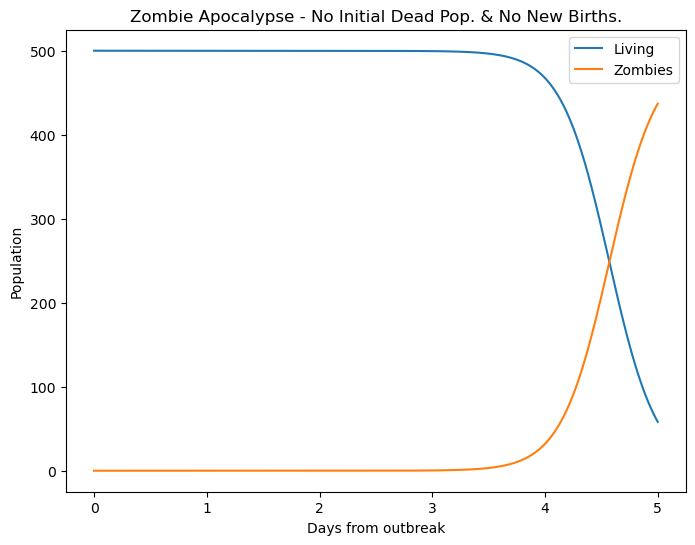

In [199]:
# initial conditions
S0 = 500.              # Population
Z0 = 0                 # Zombie population
R0 = 0                 # Death population
y0 = [S0, Z0, R0]     # initial condition vector
t  = np.linspace(0, 5., 1000)  

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Pop. & No New Births.')
plt.legend(loc=0);

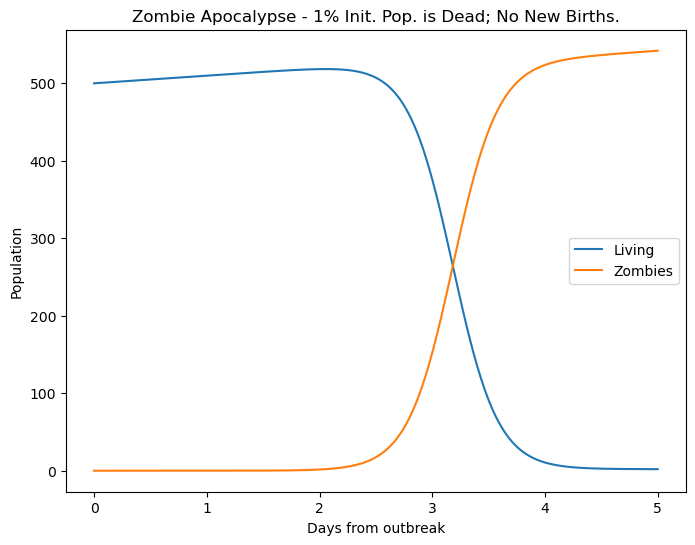

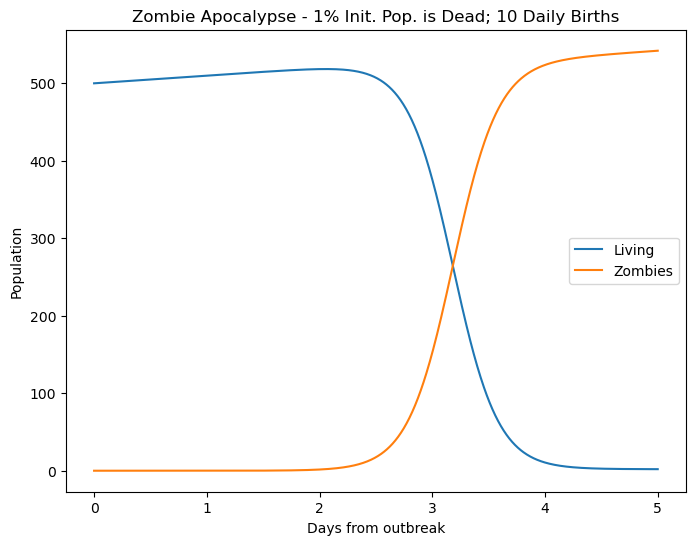

In [201]:
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0);